In [1]:
!pip install lifetimes jcopml sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv('http://raw.githubusercontent.com/nahwan25/Machine-Learning/refs/heads/main/Customersegmentation2/Dataset/Customer%20Segmentation.txt', delimiter="\t")
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [4]:
df["NilaiBelanjaSetahun"].describe()

count    5.000000e+01
mean     7.069875e+06
std      2.590619e+06
min      2.722700e+06
25%      5.257530e+06
50%      5.980077e+06
75%      9.739615e+06
max      1.088451e+07
Name: NilaiBelanjaSetahun, dtype: float64

In [5]:
scaler = MinMaxScaler()
df[['NilaiBelanjaSetahun']] = scaler.fit_transform(df[['NilaiBelanjaSetahun']])
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector             0.830113  
1      Cluster             0.000000  
2      Cluster             0.314113  
3      Cluster             0.304075  
4      Cluster             0.967005  


In [6]:
df1 = df[['Customer_ID', 'NilaiBelanjaSetahun']]
df_selected = df1[['NilaiBelanjaSetahun']]

n_clusters_options = [2, 3, 4, 5, 6]  
linkage_options = ['ward', 'complete', 'average', 'single']
affinity_options = ['euclidean', 'manhattan', 'cosine']

best_score = -1
best_params = {}

for n_clusters in n_clusters_options:
    for linkage in linkage_options:
        for affinity in affinity_options:
            # 'ward' hanya mendukung 'euclidean'
            if linkage == 'ward' and affinity != 'euclidean':
                continue
            try:
                # Model Agglomerative Clustering
                model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=affinity)
                labels = model.fit_predict(df_selected)
                
                # Cek apakah jumlah cluster valid
                if len(np.unique(labels)) < 2:
                    continue
                
                # Hitung silhouette score
                score = silhouette_score(df_selected, labels, metric=affinity)
                print(f"n_clusters={n_clusters}, linkage={linkage}, affinity={affinity}, silhouette_score={score:.4f}")
                
                # Simpan parameter terbaik
                if score > best_score:
                    best_score = score
                    best_params = {"n_clusters": n_clusters, "linkage": linkage, "affinity": affinity}
            except Exception as e:
                print(f"Error with n_clusters={n_clusters}, linkage={linkage}, affinity={affinity}: {e}")

print("\nBest parameters:", best_params, "with silhouette score:", best_score)

n_clusters=2, linkage=ward, affinity=euclidean, silhouette_score=0.8087
n_clusters=2, linkage=complete, affinity=euclidean, silhouette_score=0.8087
n_clusters=2, linkage=complete, affinity=manhattan, silhouette_score=0.8087
Error with n_clusters=2, linkage=complete, affinity=cosine: Cosine affinity cannot be used when X contains zero vectors
n_clusters=2, linkage=average, affinity=euclidean, silhouette_score=0.8087
n_clusters=2, linkage=average, affinity=manhattan, silhouette_score=0.8087
Error with n_clusters=2, linkage=average, affinity=cosine: Cosine affinity cannot be used when X contains zero vectors
n_clusters=2, linkage=single, affinity=euclidean, silhouette_score=0.8087
n_clusters=2, linkage=single, affinity=manhattan, silhouette_score=0.8087
Error with n_clusters=2, linkage=single, affinity=cosine: Cosine affinity cannot be used when X contains zero vectors
n_clusters=3, linkage=ward, affinity=euclidean, silhouette_score=0.8361
n_clusters=3, linkage=complete, affinity=euclidea

In [7]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'manhattan', linkage = 'complete')
labels = hierarchical_cluster.fit(df_selected)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df_selected['Class'] = pred_agc; df_selected['Class'] = pred_agc

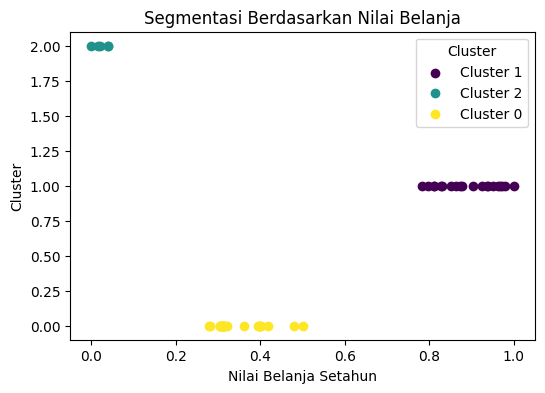

In [8]:
x = np.array(df_selected['NilaiBelanjaSetahun'])
clusters = df_selected['Class'].unique()

cmap = plt.get_cmap("viridis", len(clusters))
colors = {cluster: cmap(i) for i, cluster in enumerate(clusters)}

plt.figure(figsize=(6, 4))
for cluster in clusters:
    subset = df_selected[df_selected['Class'] == cluster]
    plt.scatter(subset['NilaiBelanjaSetahun'], [cluster] * len(subset), c=[colors[cluster]], label=f'Cluster {cluster}')

plt.title('Segmentasi Berdasarkan Nilai Belanja')
plt.xlabel('Nilai Belanja Setahun')
plt.ylabel('Cluster')
plt.legend(title="Cluster")
plt.show()

In [9]:
cluster_names = {
    1: "High Value",
    0: "Medium Value",
    2: "Low Value"
}

df_selected["Class"] = df_selected["Class"].map(cluster_names)
print(df_selected.head())

   NilaiBelanjaSetahun         Class
0             0.830113    High Value
1             0.000000     Low Value
2             0.314113  Medium Value
3             0.304075  Medium Value
4             0.967005    High Value


In [10]:
df1.head()

,Customer_ID,NilaiBelanjaSetahun
0,CUST-001,0.830113
1,CUST-002,0.000000
2,CUST-003,0.314113
3,CUST-004,0.304075
4,CUST-005,0.967005


In [11]:
df1 = df1.merge(df_selected[['NilaiBelanjaSetahun', 'Class']], on='NilaiBelanjaSetahun', how='left')

In [12]:
df1.head()

,Customer_ID,NilaiBelanjaSetahun,Class
0,CUST-001,0.830113,High Value
1,CUST-002,0.000000,Low Value
2,CUST-003,0.314113,Medium Value
3,CUST-004,0.304075,Medium Value
4,CUST-005,0.967005,High Value


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Misalnya, kita punya data awal sebelum scaling
nilai_min = 2722700 # Contoh nilai minimum sebelum scaling
nilai_max = 10884510 # Contoh nilai maksimum sebelum scaling

# Buat fungsi invers MinMaxScaler
def inverse_minmax(scaled_values, min_val, max_val):
    return scaled_values * (max_val - min_val) + min_val

# Kembalikan nilai asli
df1["NilaiBelanjaSetahun"] = inverse_minmax(df1["NilaiBelanjaSetahun"], nilai_min, nilai_max)

# Tampilkan hasil
df1.head()


,Customer_ID,NilaiBelanjaSetahun,Class
0,CUST-001,9.497929e+06,High Value
1,CUST-002,2.722700e+06,Low Value
2,CUST-003,5.286430e+06,Medium Value
3,CUST-004,5.204499e+06,Medium Value
4,CUST-005,1.061521e+07,High Value


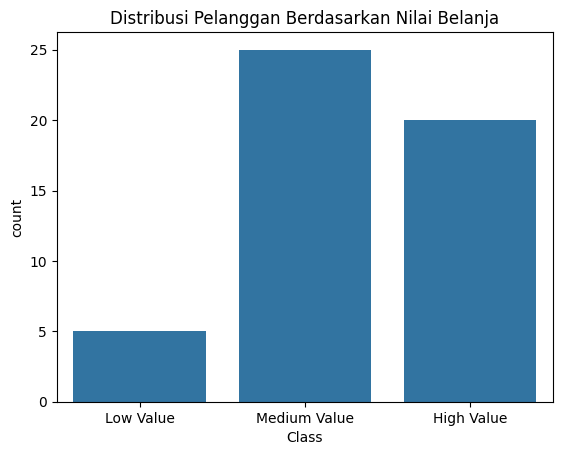

In [14]:
sns.countplot(x='Class', data=df1, order=['Low Value', 'Medium Value', 'High Value'])
plt.title("Distribusi Pelanggan Berdasarkan Nilai Belanja")
plt.show()

High Value Customers 
- Berikan program loyalitas, promo eksklusif, atau layanan VIP agar mereka tetap setia.

Medium Value Customers 
- Dorong mereka untuk naik ke segmen High Value dengan diskon atau rekomendasi produk.

Low Value Customers 
- Analisis kenapa belanja mereka rendah (harga terlalu tinggi? tidak loyal?) dan coba strategi pemasaran baru.

Ringkasan Customer Segmentation

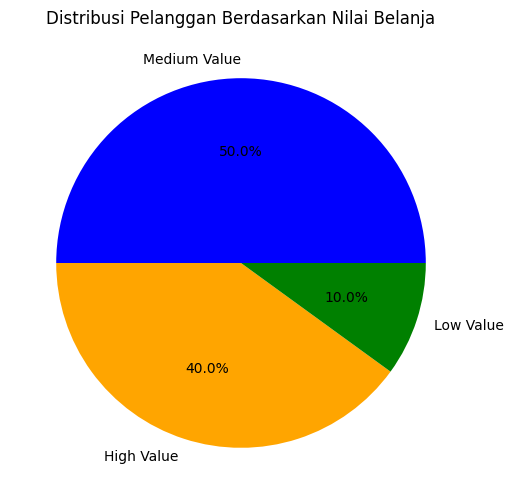

In [15]:
# Hitung jumlah pelanggan per segmen
class_counts = df1['Class'].value_counts()

# Buat Pie Chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Distribusi Pelanggan Berdasarkan Nilai Belanja')
plt.show()

Distribusi Nilai Belanja Pelanggan

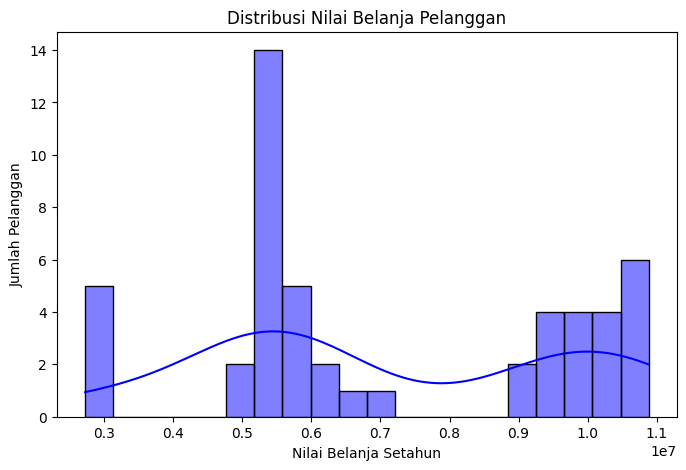

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df1['NilaiBelanjaSetahun'], bins=20, kde=True, color='blue')
plt.title('Distribusi Nilai Belanja Pelanggan')
plt.xlabel('Nilai Belanja Setahun')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Rata-rata Nilai Belanja per Kategori

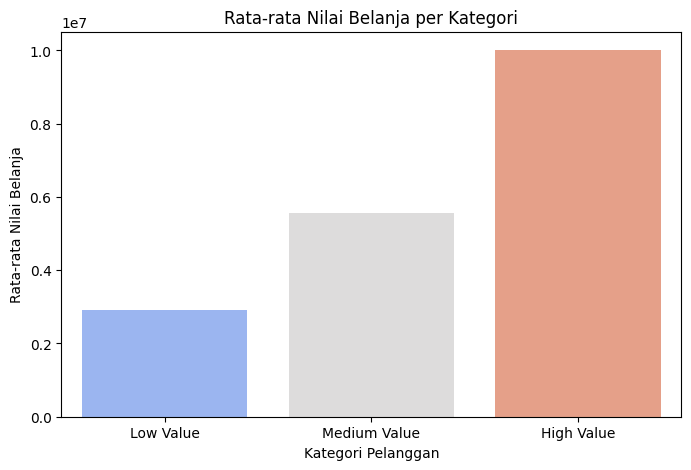

In [17]:
avg_spending = df1.groupby('Class')['NilaiBelanjaSetahun'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='coolwarm')
plt.title('Rata-rata Nilai Belanja per Kategori')
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Rata-rata Nilai Belanja')
plt.show()